In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [2]:
%matplotlib inline

# Get the data

In [3]:
digits = load_digits()

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Vizualize the data

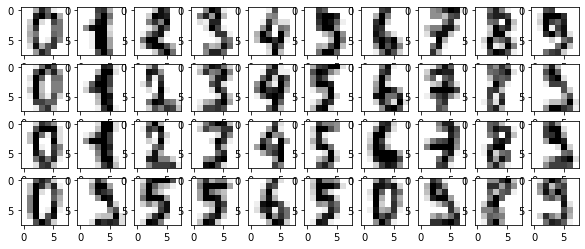

In [5]:
plt.figure(figsize=(10,4))
for i in range(1, 4*10 + 1):
    plt.subplot(4,10,i)
    plt.imshow(digits.data[i-1].reshape(8,8), cmap='binary')
plt.show()

In [6]:
for i in range(0,40,10):
    print(digits.target[i:i+10])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 9 5 5 6 5 0 9 8 9]


# Split dataset

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.2, stratify=digits.target, random_state=42)

# Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=5000, multi_class='auto', n_jobs=-1)
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Precision Recall F1 Scores

In [12]:
y_pred = log_reg_model.predict(X_test)
precision_score(y_test, y_pred, average='micro')

0.9611111111111111

In [13]:
recall_score(y_test, y_pred, average='micro')

0.9611111111111111

In [14]:
f1_score(y_test, y_pred, average='micro')

0.9611111111111111

# Confusion Matrix

In [15]:
confusion_matrix(y_test, y_pred)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  1,  0,  0,  0,  0,  4,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 34]])

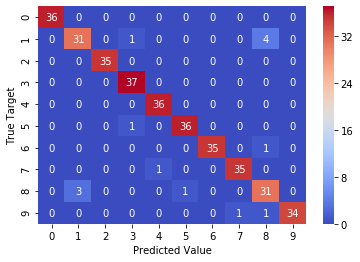

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.xlabel('Predicted Value')
plt.ylabel('True Target')
plt.show()

# Classification Report

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      0.86      0.89        36
           2       1.00      1.00      1.00        35
           3       0.95      1.00      0.97        37
           4       0.97      1.00      0.99        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       0.97      0.97      0.97        36
           8       0.84      0.89      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



## Precision Recall F1 for specific numbers

Here are the precision, recall and f1 values for predicting the number 8.

In [18]:
y_test_8 = y_test == 8
y_pred_8 = y_pred == 8
print('precision: {:.2}'.format( precision_score(y_test_8, y_pred_8) ))
print('recall:    {:.2}'.format( recall_score(y_test_8, y_pred_8) ))
print('f1 score:  {:.2}'.format( f1_score(y_test_8, y_pred_8) ))

precision: 0.84
recall:    0.89
f1 score:  0.86
